In [81]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
df=pd.read_csv(r"C:\Users\mathu\Downloads\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [84]:
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [85]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [86]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [87]:
x=df.drop('Channel',axis=1)

In [88]:
x

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [89]:
y=df.drop('Region',axis=1)

In [90]:
y

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,12669,9656,7561,214,2674,1338
1,2,7057,9810,9568,1762,3293,1776
2,2,6353,8808,7684,2405,3516,7844
3,1,13265,1196,4221,6404,507,1788
4,2,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,1,29703,12051,16027,13135,182,2204
436,1,39228,1431,764,4510,93,2346
437,2,14531,15488,30243,437,14841,1867
438,1,10290,1981,2232,1038,168,2125


In [91]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [92]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [93]:
from sklearn.preprocessing import MinMaxScaler
mxscaler=MinMaxScaler()
x=df_scaled=mxscaler.fit_transform(df)
x

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

In [94]:
x

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

In [95]:
from sklearn.cluster import AgglomerativeClustering
group=AgglomerativeClustering(n_clusters=3)
cluster=group.fit_predict(x)
cluster

array([0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,

In [96]:
from sklearn.metrics import silhouette_score
silhouette_score(x,cluster)

0.3234985905304998

# k means day-30

In [97]:
x

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

In [98]:

import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
wcss=[]
for i in range (2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


In [99]:
wcss

[17.246032935216444,
 13.878892004833084,
 10.76666039838505,
 9.075869821992745,
 7.965258938643299,
 7.344506115443515,
 6.634324182708246,
 5.880215581579842,
 5.382230246388436]

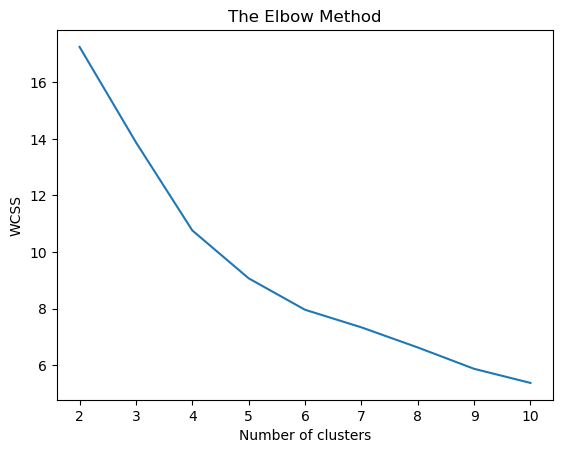

In [100]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# day31

In [101]:
model=KMeans(n_clusters=5,random_state=300)
groups=model.fit_predict(x)

In [102]:
groups

array([4, 4, 4, 4, 0, 4, 4, 4, 4, 2, 2, 4, 0, 2, 0, 4, 2, 4, 4, 4, 4, 4,
       0, 2, 0, 4, 4, 4, 2, 0, 4, 4, 4, 0, 4, 4, 0, 2, 2, 0, 0, 4, 2, 2,
       2, 2, 2, 1, 2, 2, 4, 4, 0, 2, 0, 4, 1, 2, 4, 4, 4, 1, 4, 2, 4, 1,
       4, 2, 4, 4, 4, 2, 4, 0, 4, 0, 4, 2, 4, 4, 4, 2, 2, 4, 4, 1, 1, 0,
       4, 0, 4, 4, 1, 0, 2, 4, 4, 4, 4, 4, 2, 2, 4, 0, 4, 4, 2, 2, 4, 2,
       4, 2, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4,
       4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2,
       0, 4, 4, 4, 4, 3, 2, 3, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 0, 2,
       4, 4, 2, 2, 0, 4, 4, 2, 4, 4, 4, 2, 4, 1, 4, 4, 2, 2, 2, 4, 2, 4,
       4, 2, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 1, 4, 0, 4, 0, 4, 4, 0, 0, 4, 4, 0, 4,
       2, 2, 2, 0, 2, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 0, 0, 0, 0,
       4, 4, 4, 0, 4, 4, 4, 2, 0, 4, 4, 4, 4, 4, 4,

In [103]:
type(groups)

numpy.ndarray

In [104]:
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [112]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,4
1,4
2,4
3,4
4,0
...,...
435,0
436,0
437,2
438,4


In [115]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,4
1,7057,9810,9568,1762,3293,1776,4
2,6353,8808,7684,2405,3516,7844,4
3,13265,1196,4221,6404,507,1788,4
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,4


In [116]:
cust_kmeans_data[cust_kmeans_data['Group']==3]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
181,112151,29627,18148,16745,4948,8550,3
183,36847,43950,20170,36534,239,47943,3
325,32717,16784,13626,60869,1272,5609,3


In [117]:
silhouette_score(x,groups)

0.383019662330992

In [118]:
np.round(silhouette_score(x,groups),2)

0.38

# DBSCAN

In [ ]:
#two parameters
1.epsilon
2.min points

In [ ]:
# three points 
1.core
2.border
3.noise